In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Bidirectional,LSTM,Dense,Dropout
import re
from tensorflow.keras.regularizers import l2

In [230]:
df = pd.read_csv('/home/suhas/Desktop/office/Data Science/Notes/Data Analysis/Data/twitter sentiment analysis/twitter_train.csv')

In [231]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [232]:
df.shape

(31962, 3)

In [ ]:
# Preprocess the text
from nltk.tokenize import word_tokenize

def preprocess(text):
    #Remove mentions (@user) and urls
    text = re.sub(r'@\w+https+|www\S+','',text)
    #Remove special characters and numbers,keep only letters and spaces
    text = re.sub(r'[^a-zA-Z\s]','',text)
    #convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r'\s+',' ',text).strip()
    return text




#using nltk

# text = "Hello @user, visit http://example.com!"
# def preprocess(text):
    
#     tokens = word_tokenize(text)
#     cleaned_tokens = [token.lower() for token in tokens if token.isalpha()]
#     cleaned_text = ' '.join(cleaned_tokens)
#     return cleaned_text

# preprocess(text)



In [234]:
df['cleaned_tweet'] = df['tweet'].apply(preprocess)

In [235]:
df.head()

,id,label,tweet,cleaned_tweet
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so ...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i cant use ca...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [236]:

df['cleaned_tweet'][1]

'user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx disapointed getthanked'

In [ ]:
# Tokenize and pad the sequences

vocab_size = 5000
max_length = 50

# Initialize and fit the tokenizer
#fit_on_texts() → Learns the vocabulary and assigns unique numbers to words.

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df['cleaned_tweet'])

In [ ]:
# Convert text to sequences of integers : 
# texts_to_sequences() → Converts text into sequences of numbers.

sequences = tokenizer.texts_to_sequences(df['cleaned_tweet'])

In [239]:
# Pad sequences to ensure uniform length
padd_sequences = pad_sequences(sequences,maxlen=max_length,padding='post',truncating='post')

In [240]:
X = padd_sequences
y = df['label'].values

In [241]:
X

array([[   1,   34,    4, ...,    0,    0,    0],
       [   1,    1,  169, ...,    0,    0,    0],
       [  59,   25, 3200, ...,    0,    0,    0],
       ...,
       [1052,    3,  123, ...,    0,    0,    0],
       [   1, 1509, 1283, ...,    0,    0,    0],
       [ 167,    6,    1, ...,    0,    0,    0]], dtype=int32)

In [242]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [243]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [244]:
X_train

array([[   1,    1,    1, ...,    0,    0,    0],
       [   1, 1624,   27, ...,    0,    0,    0],
       [  90,   90,  173, ...,    0,    0,    0],
       ...,
       [ 204,  174,   56, ...,    0,    0,    0],
       [  10, 1664,  490, ...,    0,    0,    0],
       [  43,  174,   57, ...,    0,    0,    0]], dtype=int32)

In [245]:
model = Sequential([
    Embedding(input_dim=vocab_size,output_dim=100,input_length=max_length),
    Bidirectional(LSTM(64)),
    Dropout(0.6),
    Dense(64,activation='relu',kernel_regularizer=l2(0.001)),
    Dropout(0.6),
    Dense(1,activation='sigmoid')
    
])

In [246]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 50, 100)           500000    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 128)               84480     
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 592,801
Trainable params: 592,801
Non-trainable params: 0
________________________________________________

In [247]:
#Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [248]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)

In [249]:
history = model.fit(X_train,y_train,epochs=15,batch_size=32,validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 1/15
800/800 [==============================] - 41s 48ms/step - loss: 0.2224 - accuracy: 0.9447 - val_loss: 0.1542 - val_accuracy: 0.9528
Epoch 2/15
800/800 [==============================] - 32s 40ms/step - loss: 0.1106 - accuracy: 0.9675 - val_loss: 0.1274 - val_accuracy: 0.9579
Epoch 3/15
800/800 [==============================] - 36s 45ms/step - loss: 0.0802 - accuracy: 0.9741 - val_loss: 0.1547 - val_accuracy: 0.9564
Epoch 4/15
800/800 [==============================] - 32s 40ms/step - loss: 0.0596 - accuracy: 0.9821 - val_loss: 0.1680 - val_accuracy: 0.9550


In [250]:
loss,accuracy = model.evaluate(X_test,y_test)
print(f"Validation Accuracy:{accuracy}")

200/200 [==============================] - 2s 10ms/step - loss: 0.1274 - accuracy: 0.9579
Validation Accuracy:0.9579227566719055


In [251]:
# Save the trained model as an H5 file
model.save("twitter_sentiment_train.h5")

In [252]:
import pickle
# Save the tokenizer for later use
with open("tokenizer.pickle", "wb") as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

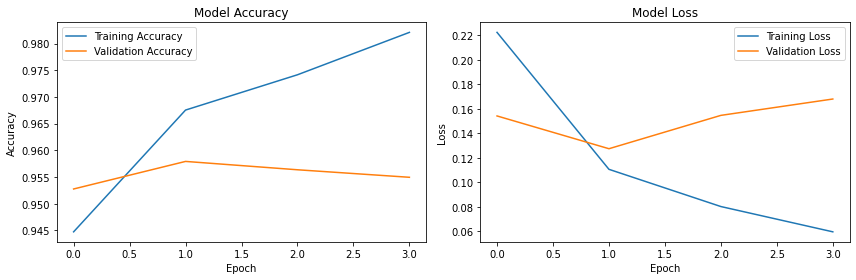

In [253]:
# Visualize training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Prediction

In [254]:
def predict_sentiment(tweet,tokenizer,model,max_length=50):
    # Step 1: Preprocess the tweet using the same preprocess function
    cleaned_tweet = preprocess(tweet)

    # Step 2: Convert the cleaned tweet to a sequence of integers
    sequence = tokenizer.texts_to_sequences([cleaned_tweet])

    # Step 3: Pad the sequence to match the model's expected input length
    pad_sequence = pad_sequences(sequence,maxlen=max_length,padding='post',truncating='post')

    # Step 4: Make the prediction using the trained model
    prediction = model.predict(pad_sequence)[0][0]

    # Interpret the prediction
    sentiment = "Positive" if prediction >= 0.5 else "Negaitve"
    probability = prediction if sentiment == 'Postive' else 1 - prediction


    return sentiment,probability

new_tweet = "This is the wonderful day"
sentiment,probability = predict_sentiment(new_tweet,tokenizer,model)

print(f"Sentiment:{sentiment},Probability:{probability}")

Sentiment:Negaitve,Probability:0.9864911139011383


## Using Hugging face models

In [255]:
from transformers import pipeline

sentiment_analyzer = pipeline('sentiment-analysis')

sentence = "The quality is terrible, and the customer support was unhelpful."

result = sentiment_analyzer(sentence)[0]

print(sentence)
print(f"{result['label']}:(score:{result['score']:.3f})")

# Example usage
sentences = [
    "I like this guy very much!",
    "This was a very bad experience."
]

for sentence in sentences:
    result = sentiment_analyzer(sentence)[0]
    print(f"Sentence: '{sentence}'")
    print(f"Sentiment: {result['label']} (Score: {result['score']:.4f})\n")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


The quality is terrible, and the customer support was unhelpful.
NEGATIVE:(score:1.000)
Sentence: 'I like this guy very much!'
Sentiment: POSITIVE (Score: 0.9999)

Sentence: 'This was a very bad experience.'
Sentiment: NEGATIVE (Score: 0.9998)

